In [115]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.vq import kmeans,vq
import numpy as np
import pandas as pd
import pyGadget

In [5]:
sim0 = pyGadget.sim.Simulation('stampede/vanilla')
sim1 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-3')
sim2 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-2')
sim3 = pyGadget.sim.Simulation('stampede/XR_sfr_1e-1')
simX = pyGadget.sim.Simulation('stampede/XR_sfr_1e-0')

halo0 = pyGadget.halo.Halo(sim0)
halo1 = pyGadget.halo.Halo(sim1)
halo2 = pyGadget.halo.Halo(sim2)
halo3 = pyGadget.halo.Halo(sim3)
haloX = pyGadget.halo.Halo(simX)

name = ['J = 0', 'J = J$_0$', 'J = 10 J$_0$', 'J = 100 J$_0$', 'J = 1000 J$_0$']

### Calculate Difference in Sink Formation Time

In [25]:
n0, n1, n2, n3, tag = 355, 269, 201, 200, '_t0'
#n0, n1, n2, n3, tag = 665, 575, 502, 501, '_t1k'
#n0, n1, n2, n3, tag = 974, 880, 802, 800, '_t2k'
#n0, n1, n2, n3, tag = 1283, 1184, 1100, 1100, '_t3k'
#n0, n1, n2, n3, tag = 1592, 1489, 1401, 1400, '_t4k'
#n0, n1, n2, n3, tag = 1900, 1794, 1701, 1700, '_t5k'

In [26]:
x = 'radius'
y = 'total_gas'
z = 'redshift'
fields = (x,y,z)

halo0.load(n0, *fields)
halo1.load(n1, *fields)
halo2.load(n2, *fields)
halo3.load(n3, *fields)

In [27]:
print halo0.data[-2]
print halo1.data[-1]
print halo2.data[-1]
print halo3.data[-1]

[    72.34561411  24020.50089157     25.03796438]
[    72.34561411  21768.65186344     25.77417933]
[    72.34561411  19180.8415483      26.67704075]
[    72.34561411  11881.37543031     26.63172921]


In [28]:
pyGadget.units.Time_yr

977814043.838273

In [29]:
a0 = 1./(1 + halo0.data[-1, -1])
a1 = 1./(1 + halo1.data[-1, -1])
a2 = 1./(1 + halo2.data[-1, -1])
a3 = 1./(1 + halo3.data[-1, -1])

t0 = a0 * pyGadget.units.Time_yr
t1 = a1 * pyGadget.units.Time_yr
t2 = a2 * pyGadget.units.Time_yr
t3 = a3 * pyGadget.units.Time_yr

In [30]:
sc = [a0, a1, a2, a3]
print sc, argmin(sc)

[0.038405460020081036, 0.037349417430586812, 0.036131030376071814, 0.036190279378597978] 2


In [24]:
print "{:.5e}".format(t0 - t2)

2.22397e+06


So, sim0, sim1, sim2 and sim3 form at $z = 25.04$, $25.77$, $26.68$ and $26.63$ respectively.

This is good for at time difference of $2.2$ million years.

### Calculate Total Gas Mass above 100 cc at Sink Formation

In [36]:
n0, n1, n2, n3, tag = 355, 269, 201, 200, '_t0'
snap0 = sim0.load_snapshot(n0, 'ndensity', 'masses')
snap1 = sim1.load_snapshot(n1, 'ndensity', 'masses')
snap2 = sim2.load_snapshot(n2, 'ndensity', 'masses')
snap3 = sim3.load_snapshot(n3, 'ndensity', 'masses')

Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...


In [82]:
m10 = []
m100 = []
for snap in [snap0, snap1, snap2, snap3]:
    dens = snap.gas.get_number_density()
    mass = snap.gas.get_masses()
    (m,) = pyGadget.analyze.data_slice(dens >= 10, mass)
    m10.append(m.sum())
    (m,) = pyGadget.analyze.data_slice(dens >= 100, mass)
    m100.append(m.sum())
    snap.close()

In [80]:
m10

[4533.38731451077, 4347.6743549213534, 3703.2401933110255, 1966.2708556098048]

In [81]:
m100

[2478.1373076587702,
 2198.5708409325402,
 2104.1560443290605,
 1276.1654563433501]

So, cold core mass is 2478, 2198, 2104 and 1276 $M_{\odot}$ in each simulation.

### Disk Mass at Final Snapshot

In [113]:
snaplist = ((355, 269, 201, 200), (665, 575, 502, 501),(974, 880, 802, 800), (1283, 1184, 1100, 1100), 
            (1592, 1489, 1401, 1400), (1900, 1794, 1701, 1700))
m8all = []
for n0,n1,n2,n3 in snaplist:
    snap0 = sim0.load_snapshot(n0, 'ndensity', 'masses')
    snap1 = sim1.load_snapshot(n1, 'ndensity', 'masses')
    snap2 = sim2.load_snapshot(n2, 'ndensity', 'masses')
    snap3 = sim3.load_snapshot(n3, 'ndensity', 'masses')
    m8 = []
    for snap in [snap0, snap1, snap2, snap3]:
        dens = snap.gas.get_number_density()
        mass = snap.gas.get_masses()
        (m,) = pyGadget.analyze.data_slice(dens >= 1e8, mass)
        m8.append(m.sum())
    m8all.append(m8)

Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 7998938 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 7999483 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 7999057 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 7999643 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 7998137 highest resolution particles.
Loading data...
Turning on gas particle refinement.
There are 7999085 highest resolution particles.
Loading data...


[[65.966283108694, 22.082309280677137, 52.096524971869499, 11.979098880688015],
 [78.181714396399599,
  30.560734382422314,
  84.178649224460116,
  15.952437473665963],
 [86.940784231474197,
  38.315391487675782,
  99.00850776479389,
  18.493010849101935],
 [91.002747477085023,
  41.299088126268607,
  106.17233385250637,
  19.970088392960104],
 [94.976086070065321,
  43.130664280651999,
  117.45720628758083,
  20.280274677170233],
 [99.023278540231544,
  46.764275038541882,
  125.92086061388619,
  21.373312059625114]]

In [117]:
dm = pd.DataFrame(m8all,index=[0, 1000, 2000, 3000, 4000, 5000], columns=['J=0', 'J0', 'J10', 'J100'])
dm

,J=0,J0,J10,J100
0,65.966283,22.082309,52.096525,11.979099
1000,78.181714,30.560734,84.178649,15.952437
2000,86.940784,38.315391,99.008508,18.493011
3000,91.002747,41.299088,106.172334,19.970088
4000,94.976086,43.130664,117.457206,20.280275
5000,99.023279,46.764275,125.920861,21.373312


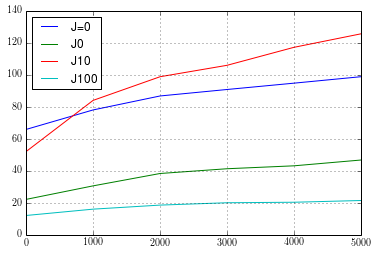

In [118]:
dm.plot()

In [91]:
snap = sim2.load_snapshot(1701, 'ndensity', 'masses', 'coordinates', 'velocities')
xyz = snap.gas.get_coords('AU',centering='avg')
uvw = snap.gas.get_velocities()
dens = snap.gas.get_number_density()
xyz, uvw, dens, mass = pyGadget.analyze.data_slice(snap.gas.ndensity > 1e8, snap.gas.coordinates, snap.gas.velocities,
                                                   snap.gas.ndensity, snap.gas.masses)

Turning on gas particle refinement.
There are 7995003 highest resolution particles.
Loading data...
Center averaged over 3528 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: 5.355e+08 5.365e+08 5.291e+08
Center averaged over 3528 particles
Center averaged over all particles with density greater than 1.00e+08 particles/cc
Density averaged box center: -4.538e-01 1.481e-01 1.523e+00


In [94]:
centroids,_ = kmeans(xyz, 4)
idx,_ = vq(xyz, centroids)

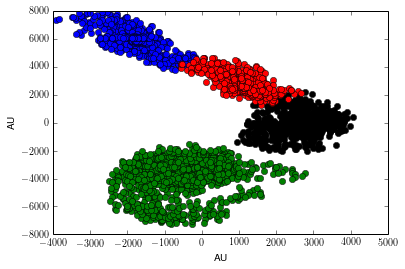

In [95]:
plt.plot(-xyz[idx==0,0],-xyz[idx==0,1],'ok',
         -xyz[idx==1,0],-xyz[idx==1,1],'ob',
         -xyz[idx==2,0],-xyz[idx==2,1],'og',
         -xyz[idx==3,0],-xyz[idx==3,1],'or')
plt.xlabel('AU')
plt.ylabel('AU')

In [96]:
m = mass[idx==2]

In [97]:
m.sum()

66.113990863080843

In [103]:
np.unique(mass)

array([  1.47707754e-02,   3.27911215e+00,   6.52868274e+00,
         1.01475227e+01,   1.10189985e+01,   1.85668647e+01,
         2.43570087e+01])

In [98]:
mass.sum()

125.92086061388619

So, total mass of the central disk feature in each simulation in order is 99, 46, **66** and 21 $M_{\odot}$

Total cold dense ($n>10^8$) gas in each simulation is 99, 46, **125**, and 21 $M_{\odot}$.

### Disk Mass vs Sink Mass

In [99]:
disk = np.array([99.023278540231544, 46.764275038541882, 66.113990863080843, 21.373312059625114])
sink = np.array([41., 23.3, 43., 10.7])

In [100]:
sink/disk

array([ 0.41404406,  0.49824358,  0.65039184,  0.50062433])

In [104]:
disk = np.array([99.023278540231544, 46.764275038541882, 125.92086061388619, 21.373312059625114])
sink = np.array([41., 23.3, 43.+30.9, 10.7])

In [105]:
sink/disk

array([ 0.41404406,  0.49824358,  0.58687655,  0.50062433])